## Import stuff of D7RGESolver

In [1]:
import matplotlib
import sys
import os
sys.path.append(os.path.abspath('..'))  
from RGE_dim7 import solve_rge
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Here, we take $C_7^i=1.72879e-17$ as an arbitrary reference point to solve the RGEs and extract the neutrino mass operators at $\Lambda_{EW}$ via $m_{\nu}^{ee}=m_{\beta\beta}=-v^2C_{LH5}^{11}-\frac{v^4}{2}C_{LH}^{11}$

In [2]:
common_ref=1.72879e-17
vev=246

In [3]:
C_in={"QuLLH_3311":common_ref}
C_out=solve_rge(1e4,80,C_in,basis="up")
QuLLH_numass_ref = np.abs(C_out["LH5_11"] * vev**2 + C_out["LH_11"] * vev**4 / 2) * 1e9
print(r"numass_ref =", QuLLH_numass_ref,r"eV")

numass_ref = 8.856193737597847 eV


In [4]:
C_in={"eLLLHS_3113":common_ref}
C_out=solve_rge(1e4,80,C_in,basis="up")
eLLLHS_numass_ref = np.abs(C_out["LH5_11"] * vev**2 + C_out["LH_11"] * vev**4 / 2) * 1e9
print(r"numass_ref =", eLLLHS_numass_ref,r"eV")

numass_ref = 0.007031198879673996 eV


In [5]:
C_in={"eLLLHM_3113":common_ref}
C_out=solve_rge(1e4,80,C_in,basis="up")
eLLLHM_numass_ref = np.abs(C_out["LH5_11"] * vev**2 + C_out["LH_11"] * vev**4 / 2) * 1e9
print(r"numass_ref =", eLLLHM_numass_ref,r"eV")

numass_ref = 0.005002454541711006 eV


In [6]:
C_in={"dLQLH1_3131":common_ref}
C_out=solve_rge(1e4,80,C_in,basis="up")
dLQLH1_numass_ref = np.abs(C_out["LH5_11"] * vev**2 + C_out["LH_11"] * vev**4 / 2) * 1e9
print(r"numass_ref =", dLQLH1_numass_ref,r"eV")

numass_ref = 0.012941575085771402 eV


In [7]:
C_in={"DLDH1_11":common_ref}
C_out=solve_rge(1e4,80,C_in,basis="up")
DLDH1_numass_ref = np.abs(C_out["LH5_11"] * vev**2 + C_out["LH_11"] * vev**4 / 2) * 1e9
print(r"numass_ref =", DLDH1_numass_ref,r"eV")

numass_ref = 0.4899527485130863 eV


In [8]:
C_in={"DLDH2_11":common_ref}
C_out=solve_rge(1e4,80,C_in,basis="up")
DLDH2_numass_ref = np.abs(C_out["LH5_11"] * vev**2 + C_out["LH_11"] * vev**4 / 2) * 1e9
print(r"numass_ref =", DLDH2_numass_ref,r"eV")

numass_ref = 0.5233666732483063 eV


In [9]:
C_in={"LHW_11":common_ref}
C_out=solve_rge(1e4,80,C_in,basis="up")
LHW_numass_ref = np.abs(C_out["LH5_11"] * vev**2 + C_out["LH_11"] * vev**4 / 2) * 1e9
print(r"numass_ref =", LHW_numass_ref,r"eV")

numass_ref = 1.2284859460180688 eV


### Draw the $m_{\nu}^{ee}-C_7^i(\Lambda)$ 

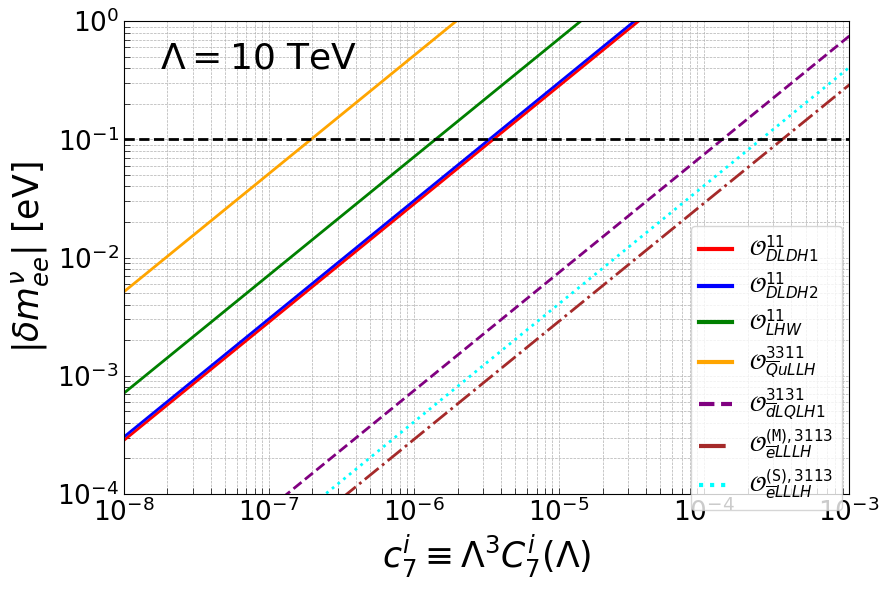

In [10]:
def plot_RGE_data_groups(data_groups, labels=None, xlabel=None, ylabel=None, 
                         text_position=(0.5, 0.8), text=r"$\Lambda=10$ TeV", text_fontsize=16, 
                         name="numass_evolution", xlim=None, ylim=None):
    
    colors = ['r', 'b', 'g', 'orange', 'purple', 'brown', 'cyan', 'black', 'lime']
    linestyles = ['-', '-', '-', '-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 2)), (0, (1, 1)), (0, (3, 2, 1, 2))]

    fig_width = 9 
    fig_height = fig_width * (2 /3) 
    plt.figure(figsize=(fig_width, fig_height))  

    if labels is None:
        labels = [f"Data {i+1}" for i in range(len(data_groups))]  

    for idx, data in enumerate(data_groups):  
        plt.plot(data['x_values'], data['y_values'], label=f'{labels[idx]}', 
                 color=colors[idx % len(colors)], linestyle=linestyles[idx % len(linestyles)], linewidth=2)  

    plt.xlabel(xlabel if xlabel else r"$C_x$", fontsize=25)  
    plt.ylabel(ylabel if ylabel else r'$|m^{\nu}_{ee}|$ [eV]', fontsize=25)    
    plt.tick_params(axis='both', which='both', direction='in', length=4, width=0.5, labelsize=19)
    plt.xscale('log')  
    plt.yscale('log')  
 
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)

    legend = plt.legend(
        frameon=True,
        bbox_to_anchor=(0.78, 0.57),
        loc='upper left',
        borderaxespad=0.05,
        fontsize=15.6,
        labelspacing=0.25, 
        handlelength=1.5 
    )  

    for line in legend.get_lines():
        line.set_linewidth(3)

    plt.axhline(y=0.1, color='black', linestyle='--', linewidth=2)  

    text_position = (0.05, 0.9)  # Middle of x-axis, 80% up
    plt.text(text_position[0], text_position[1], r"$\Lambda = 10$ TeV", 
             fontsize=26, color='black', transform=plt.gca().transAxes)

    plt.grid(True, which='both', linestyle='--', linewidth=0.5,alpha=1)
    plt.tight_layout()

    
    save_dir = 'Figures'
    os.makedirs(save_dir, exist_ok=True)

    
    file_name = os.path.join(save_dir, f"{name}.pdf")
    plt.savefig(file_name, format='pdf')  
    plt.show()


# Common reference value
rescale=(1e4)**3
LHW_ref=common_ref*rescale
DLDH1_ref=common_ref*rescale
DLDH2_ref=common_ref*rescale
dLQLH1_ref=common_ref*rescale
eLLLHM_ref=common_ref*rescale
eLLLHS_ref=common_ref*rescale
QuLLH_ref=common_ref*rescale


# Now the data_groups using *_ref consistently
data_groups = [
    {'x_values': [DLDH1_ref*1e-4, DLDH1_ref, DLDH1_ref*1e4], 'y_values': [DLDH1_numass_ref*1e-4, DLDH1_numass_ref, DLDH1_numass_ref*1e4]},
    {'x_values': [DLDH2_ref*1e-4, DLDH2_ref, DLDH2_ref*1e4], 'y_values': [DLDH2_numass_ref*1e-4, DLDH2_numass_ref, DLDH2_numass_ref*1e4]},
    {'x_values': [LHW_ref*1e-4, LHW_ref, LHW_ref*1e4], 'y_values': [LHW_numass_ref*1e-4, LHW_numass_ref, LHW_numass_ref*1e4]},
    {'x_values': [QuLLH_ref*1e-4, QuLLH_ref, QuLLH_ref*1e4], 'y_values': [QuLLH_numass_ref*1e-4, QuLLH_numass_ref, QuLLH_numass_ref*1e4]},
    {'x_values': [dLQLH1_ref*1e-4, dLQLH1_ref, dLQLH1_ref*1e4], 'y_values': [dLQLH1_numass_ref*1e-4, dLQLH1_numass_ref, dLQLH1_numass_ref*1e4]},
    {'x_values': [eLLLHM_ref*1e-4, eLLLHM_ref, eLLLHM_ref*1e4], 'y_values': [eLLLHM_numass_ref*1e-4, eLLLHM_numass_ref, eLLLHM_numass_ref*1e4]},
    {'x_values': [eLLLHS_ref*1e-4, eLLLHS_ref, eLLLHS_ref*1e4], 'y_values': [eLLLHS_numass_ref*1e-4, eLLLHS_numass_ref, eLLLHS_numass_ref*1e4]}
]


plot_RGE_data_groups(data_groups, labels=[r"$\mathcal{O}_{DLDH1}^{11}$", r"$\mathcal{O}_{DLDH2}^{11}$", r"$\mathcal{O}_{LHW}^{11}$", 
                                          r"$\mathcal{O}_{\overline{Q}uLLH}^{3311}$",r"$\mathcal{O}_{\overline{d}LQLH1}^{3131}$",
                                          r"$\mathcal{O}_{\overline{e}LLLH}^{{(\mathtt{M})},3113}$",r"$\mathcal{O}_{\overline{e}LLLH}^{{(\mathtt{S})},3113}$"], 
                     xlabel=r"$c_7^i\equiv\Lambda^3C_7^i(\Lambda)$", ylabel=r'$|\delta m^{\nu}_{ee}|$ [eV]', 
                     text=r"$\Lambda = 10$ TeV", name="RG_mixed_numass",xlim=(1e-8, 1e-3), ylim=(1e-4, 1e0))